# <font color=blue> *Exploratory Data Analysis Notebook* </font>
Book Recommender System<br>
Sabrina Ruiz
***


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
# setting a color palette for Seaborn visualizations
bright_palette = sns.set_palette(palette = "bright")

#other visual standards
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')



In [3]:
def set_custom_palette(series, max_color = 'turquoise', other_color = 'lightgrey'):
    max_val = series.max()
    pal = []

    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

In [4]:
#### USE CELL AS NEEDED ####
# GOOGLE COLAB IMPORT METHOD
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [5]:
# insert large files directly from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
#import os
#path="/content/drive/My Drive/"
#os.chdir(path)
#os.listdir(path)


In [7]:
books_rating_raw = pd.read_csv('/content/drive/My Drive/books_rating.csv')
books_rating_raw.head(2)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...


In [8]:
# importing data file(s)
book_data_raw = pd.read_csv('books_data.csv') #book info:title, author, genre, etc
book_data_raw

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0


# Table of Content
   1. [Part 1](#Part-1-Basic-Data-Wrangling)  Basic Data Wrangling
    
   2. [Part 2](#Part-2-Basic-EDA)  Basic EDA
    
   3. [Part 3](#-Part-3-Advanced-EDA)  Part 3 Advanced EDA

# Part 1 Basic Data Wrangling

### First Dataset: "Book Data"

In [9]:
print("The shape of 'book data':",book_data_raw.shape)

The shape of 'book data': (212404, 10)


In [10]:
book_data_raw.dtypes

Title             object
description       object
authors           object
image             object
previewLink       object
publisher         object
publishedDate     object
infoLink          object
categories        object
ratingsCount     float64
dtype: object

At a glance, `publishedDate` seems to be the only feature with a mismatched datatype.

In [11]:
book_data_raw.head(3)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN


Now I will drop some unecessary columns for the following reasons:
- `image` I do not plan to create an image-based system
- `previewLink` book names are enough
- `infoLink` another weblink that won't be used
- `publisher` I don't plan to use publisher-specific breakdowns
- `description` for the purposes of this project, I will use the written review for text analysis. As such, the book `description` will not be needed. I would like to explore the possibility of creating a more sophisticated recommender system including this feature in the future.

In [12]:
book_data_df = book_data_raw.drop(['image', 'previewLink', 'infoLink','publisher','description' ], axis=1)
book_data_df # original file - redundant columns

,Title,authors,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,['Julie Strain'],1996,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,['Philip Nel'],2005-01-01,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,['David R. Ray'],2000,['Religion'],NaN
3,Whispers of the Wicked Saints,['Veronica Haddon'],2005-02,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],2003-03-01,NaN,NaN
...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],2000-06-01,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,NaN,1995,['Juvenile Fiction'],NaN
212401,Mamaw,['Wild Wild Cabbage'],2018-01-17,NaN,NaN
212402,The Autograph Man,['Zadie Smith'],2003-08-12,['Fiction'],19.0


Moving on:

From the above, it seems that each `authors` and `categories` value is in a list format with the authors name surrounded by brackets. I don't see an obvious reason for this, so I will remove them.  

In [13]:
book_data_df['authors'] = book_data_df['authors'].str.strip('[\'\']')
book_data_df['categories'] = book_data_df['categories'].str.strip('[\'\']')

book_data_df.head(1)

,Title,authors,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,Julie Strain,1996,Comics & Graphic Novels,NaN


Next, the `publishedDate` is inconsistent. I will limit all entries to just the year, as that is the only information on all entries.

In [14]:
book_data_df.publishedDate = book_data_df.publishedDate.str.extract(r'(^[0-9]{4})', expand=False)
book_data_df.head(1)

,Title,authors,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,Julie Strain,1996,Comics & Graphic Novels,NaN


### Second Dataset: "Books Rating"

In [15]:
print("The shape of 'book rating data':",books_rating_raw.shape)

The shape of 'book rating data': (3000000, 10)


This file is noticeably bigger than the previous one, with 3 million rows and 10 features.

In [16]:
books_rating_raw.dtypes

Id                     object
Title                  object
Price                 float64
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object

In [17]:
books_rating_raw.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


Since this is the main dataframe for my project, I am hesitant to drop many columns from the beginning.  However, I will drop `Price`, `review/helpfulness`, and `review/time` as I see no need for that for this project.

In [18]:
books_rating_df = books_rating_raw.drop(['Price','review/helpfulness','review/time'], axis=1)
books_rating_df.head()

,Id,Title,User_id,profileName,review/score,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [19]:
books_rating_df.rename(columns = {'review/score':'review_score'}, inplace = True) #rename REVIEW SCORE
books_rating_df.rename(columns = {'review/summary':'review_summary'}, inplace = True) #rename REVIEW SUMMARY
books_rating_df.rename(columns = {'review/text':'review'}, inplace = True) #rename REVIEW TEXT

books_rating_df.head(3)

,Id,Title,User_id,profileName,review_score,review_summary,review
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."


### Merging the Two Dataframes

In [20]:
books_rating_df.head(1)

,Id,Title,User_id,profileName,review_score,review_summary,review
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...


In [21]:
book_data_df.head(1)

,Title,authors,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,Julie Strain,1996,Comics & Graphic Novels,NaN


Seeing as both dataframes have the Title in common, that is how I will merge the two. First, I will fill in any missing title values to maintain as much volume as possible

In [22]:
#checking for missing values, BOOK DATA
book_data_df.isna().sum(axis=0)

Title                 1
authors           31413
publishedDate     25442
categories        41199
ratingsCount     162652
dtype: int64

In [23]:
#finding that one missing Title
book_data_df[book_data_df['Title'].isnull()] # Nan Yar - Who Am I?

,Title,authors,publishedDate,categories,ratingsCount
1066,NaN,Maharshi Ramana,2015,NaN,1.0


In [24]:
#does the author have another book?
book_data_df.loc[book_data_df['authors'] == 'Maharshi Ramana']

# the answer is no, and a quick google search does not have a book that matches this exact published date

,Title,authors,publishedDate,categories,ratingsCount
1066,NaN,Maharshi Ramana,2015,NaN,1.0


In [25]:
#drop the one title missing
book_data_df.dropna(subset=['Title'], inplace=True)

In [26]:
book_data_df.isna().sum(axis=0)

Title                 0
authors           31413
publishedDate     25442
categories        41198
ratingsCount     162652
dtype: int64

In [27]:
#checking for missing values, BOOKS REVIEW
books_rating_df.isna().sum(axis=0)


Id                     0
Title                208
User_id           561787
profileName       561886
review_score           0
review_summary        38
review                 8
dtype: int64

In [28]:
books_rating_df[books_rating_df['Title'].isnull()] # Nan Yar - Who Am I?

,Id,Title,User_id,profileName,review_score,review_summary,review
13110,B00005XZDV,NaN,AY44TQ8XGQ7RR,"readersblock ""ZuZu""",5.0,A good book...read it!,In an era of other prolific writers such as Ja...
358889,0801841119,NaN,NaN,NaN,2.0,Strange adapted translations of Virgil's poems.,"I only read Georgics in this book, but I'm not..."
358890,0801841119,NaN,A3F19JZZ07PDX0,Philippe Landry,1.0,Do Not Get This Translation!,You can't even really call this a translation;...
358891,0801841119,NaN,A1JO4MQFLXGYVS,Okla Elliott,5.0,Giving Life Back to a Dead Language and a Dead...,Slavitt's translation of Virgil's Eclogues and...
432033,0595241034,NaN,A1ASFZRH6ZLCOE,"""ajm502""",4.0,Still trying to figure it out....Thanks for no...,I can definitely relate to the story line in D...
...,...,...,...,...,...,...,...
2826589,059528812X,NaN,A6SZZSMX7DQG1,Elly Sparks,5.0,"Wry, Witty, and True Mystery","This is a great book about friendship, loyalty..."
2826590,059528812X,NaN,A352HZ1YURWGVL,Erin P,1.0,Terrible,I saw this title in my local library on the do...
2826591,059528812X,NaN,A2VPLBU4M5NUXV,Sara,5.0,Bone deep emotional truth,Justify The Means offers bone-deep emotional t...
2826592,059528812X,NaN,AVDFWLRZRBTMI,Gary,5.0,A FRESH VOICE,"With keen prose and an extraordinary eye, Madi..."


In [29]:
#there are missing titles, but there is no id I can use to try and fill these in.
# Seeing it's small percentage, I will accept this loss
round(books_rating_df.isna().sum(axis=0)/books_rating_df.shape[0]*100,2)

Id                 0.00
Title              0.01
User_id           18.73
profileName       18.73
review_score       0.00
review_summary     0.00
review             0.00
dtype: float64

In [30]:
merged_df = pd.merge(books_rating_df, book_data_df, on='Title', how='inner')

In [31]:
merged_df.shape

(2999792, 11)

In [32]:
merged_df.head(3)

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels,NaN
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,2005,Biography & Autobiography,NaN
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,2005,Biography & Autobiography,NaN


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999792 entries, 0 to 2999791
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Id              object 
 1   Title           object 
 2   User_id         object 
 3   profileName     object 
 4   review_score    float64
 5   review_summary  object 
 6   review          object 
 7   authors         object 
 8   publishedDate   object 
 9   categories      object 
 10  ratingsCount    float64
dtypes: float64(2), object(9)
memory usage: 274.6+ MB


I lost exactly 208, which matches the number of missing titles from the book reviews file.

### Addressing Null Values

Now that I have one working dataframe, I can further clean the data from null and duplicate values. First, let's see how significant these null values are by percent:

In [34]:
#checking for missing values in merged dataframe
merged_df.isna().sum(axis=0)

Id                      0
Title                   0
User_id            561774
profileName        561873
review_score            0
review_summary         38
review                  8
authors            390634
publishedDate      356397
categories         551290
ratingsCount      1360694
dtype: int64

In [35]:
# percentage of missing values to see the weight
print('the percentage of missing values:')
round(merged_df.isna().sum(axis=0)/merged_df.shape[0]*100,2)

the percentage of missing values:


Id                 0.00
Title              0.00
User_id           18.73
profileName       18.73
review_score       0.00
review_summary     0.00
review             0.00
authors           13.02
publishedDate     11.88
categories        18.38
ratingsCount      45.36
dtype: float64

I will most definitely be using the `User_id` (and `profileName` less likely), so I will fill in nulls with "unknown."

In [36]:
merged_df["User_id"] = merged_df["User_id"].fillna("unknown")
merged_df["profileName"] = merged_df["profileName"].fillna("unknown")
merged_df.isna().sum(axis=0)/merged_df.shape[0]*100,2

(Id                 0.000000
 Title              0.000000
 User_id            0.000000
 profileName        0.000000
 review_score       0.000000
 review_summary     0.001267
 review             0.000267
 authors           13.022036
 publishedDate     11.880724
 categories        18.377608
 ratingsCount      45.359612
 dtype: float64,
 2)

I'm not sure if I will end up using the author column, but if so, I will add them in via google searches

In [37]:
merged_df[merged_df['authors'].isnull()] #200 K rows is a lot. It might be better to drop it.

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories,ratingsCount
205,B0006WHSNE,Mini-mysteries,A2ZO0WE12GATPW,A. J. Arndt,5.0,One of my favorite books.,I bought this book when I was a kid. I've lost...,NaN,NaN,NaN,1.0
206,B0006WHSNE,Mini-mysteries,ARXQPCLEIGYIR,"Penny Lane ""The BandAid""",1.0,Very Not Worth Your Time,The book was wriiten very horribly. I would ne...,NaN,NaN,NaN,1.0
260,9687968478,Cien Aos de BOXEO (One Hundred Years of Box),A3EI9DJOLMOJRA,Jon Joel Westmore,5.0,ME FASCINA LEER LA VIDA PROFESIONAL,Y TAMBIEN LA VIDA INTIMA DE LOS TRIUNFADORES.....,NaN,1864,NaN,NaN
261,9687968478,Cien Aos de BOXEO (One Hundred Years of Box),A2UHQGFD4X8TC0,Jean Marie Clair,5.0,POCAS COSAS TAN IMPACTANTES Y,"LLENAS DE MOTIVACION, COMO LAS HISTORIAS DE ES...",NaN,1864,NaN,NaN
262,9687968478,Cien Aos de BOXEO (One Hundred Years of Box),unknown,unknown,5.0,SI TE ATRAEN LAS HISTORIAS REALES,DE LUCHA Y TRIUNFO..ESTE LIBRO TE DEJAR&Aacute...,NaN,1864,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2999603,1555175198,Hidden Treasures of Ancient American Cultures,A219AOH82I8EMC,Pilsner,1.0,This Book is Not a Treasure,This book is deceptively titled to appeal to a...,NaN,NaN,NaN,NaN
2999604,1555175198,Hidden Treasures of Ancient American Cultures,A3U71FM02G67WQ,Morningstar,5.0,Great book!,One of a kind. John Heinerman speaks from pers...,NaN,NaN,NaN,NaN
2999605,1555175198,Hidden Treasures of Ancient American Cultures,AK19CYS673UWB,aaron sorensen,4.0,Hidden Treasures of Ancient American Cultures,I find the book to be written very well with l...,NaN,NaN,NaN,NaN
2999609,B000I4X6Z4,The Dirty Pair II: Dangerous Acquaintances (Di...,A2KU633HBKXPXZ,"David P Flynn ""David P Flynn""",4.0,Dirty Pair: Sim Hell,In this story we find our two heroines going f...,NaN,1989,"Comic books, strips, etc",NaN


In [38]:
merged_df.loc[merged_df['Title'] == 'Cien Aos de BOXEO (One Hundred Years of Box)', ['authors']] = 'Marcos Chavez Macias'
merged_df.loc[merged_df['Title'] == 'Behind the Moon', ['authors']] = 'Howard Pyle'


# there are SO many, this would take forever, but as of 1/10, I am not using author, simply text analysis,
# so I will leave this as unknown, and choose to ultimately drop or fill in missing data.

In [39]:
merged_df["authors"] = merged_df["authors"].fillna("unknown")
merged_df.isna().sum(axis=0)/merged_df.shape[0]*100,2

(Id                 0.000000
 Title              0.000000
 User_id            0.000000
 profileName        0.000000
 review_score       0.000000
 review_summary     0.001267
 review             0.000267
 authors            0.000000
 publishedDate     11.880724
 categories        18.377608
 ratingsCount      45.359612
 dtype: float64,
 2)

In the interest of time, and with no current plans to use `categories`, I will fill in "uncategorized" for nulls.

In [40]:
merged_df["categories"] = merged_df["categories"].fillna("uncategorized")
merged_df.isna().sum(axis=0)/merged_df.shape[0]*100,2

(Id                 0.000000
 Title              0.000000
 User_id            0.000000
 profileName        0.000000
 review_score       0.000000
 review_summary     0.001267
 review             0.000267
 authors            0.000000
 publishedDate     11.880724
 categories         0.000000
 ratingsCount      45.359612
 dtype: float64,
 2)

As `review` is central to future modeling, I will drop rows with missing written reviews.

In [41]:
merged_df.dropna(subset=['review'], inplace=True)
merged_df.isna().sum(axis=0)/merged_df.shape[0]*100,2

(Id                 0.000000
 Title              0.000000
 User_id            0.000000
 profileName        0.000000
 review_score       0.000000
 review_summary     0.001267
 review             0.000000
 authors            0.000000
 publishedDate     11.880689
 categories         0.000000
 ratingsCount      45.359666
 dtype: float64,
 2)

I am reserving judgement on the `review_summary` column. As such, I will simply fill in, but might ultimately drop the column in the next notebook.

In [42]:
merged_df["review_summary"] = merged_df["review_summary"].fillna("none")
merged_df.isna().sum(axis=0)/merged_df.shape[0]*100,2

(Id                 0.000000
 Title              0.000000
 User_id            0.000000
 profileName        0.000000
 review_score       0.000000
 review_summary     0.000000
 review             0.000000
 authors            0.000000
 publishedDate     11.880689
 categories         0.000000
 ratingsCount      45.359666
 dtype: float64,
 2)

In [43]:
merged_df[merged_df['ratingsCount'].isnull()]

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels,NaN
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,2005,Biography & Autobiography,NaN
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,2005,Biography & Autobiography,NaN
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,2005,Biography & Autobiography,NaN
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,2005,Biography & Autobiography,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2999776,B000NSGW7E,Ghost Story,APED18EB6YA02,Nicholas Pfeiffer,5.0,Great deal. thanks for the quick ship.,So far it is a really good book. I was very ha...,Peter Straub,2020,Fiction,NaN
2999777,B000NSGW7E,Ghost Story,A9Z9ETUI48IVC,Bill F. Mccann Jr.,5.0,Shivers me timbers!!!!!,"The best ""ghost story"" I've ever read. Don't b...",Peter Straub,2020,Fiction,NaN
2999778,B000NSGW7E,Ghost Story,APW0VLW2NWO98,Kim Klein,5.0,Great Transactions!,It was a great transaction! The book was descr...,Peter Straub,2020,Fiction,NaN
2999779,B000NSGW7E,Ghost Story,AD74ICXKB2O0B,James Janiesch,5.0,unbelievable condition,"Purchased ""Ghost Story"" from ""Wonderbook and V...",Peter Straub,2020,Fiction,NaN


In [44]:
merged_df["publishedDate"].mode()[0]

'2012'

`ratingsCount` is essentially a frequency counter column. But, since there are missing data points, I will assume it would be easier to drop and recreate this column as needed.

In [45]:
cut_merged_df = merged_df.drop(['ratingsCount' ], axis=1)
cut_merged_df

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,2005,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,2005,Biography & Autobiography
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,2005,Biography & Autobiography
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,2005,Biography & Autobiography
...,...,...,...,...,...,...,...,...,...,...
2999787,B000NSLVCU,The Idea of History,unknown,unknown,4.0,Difficult,"This is an extremely difficult book to digest,...",R. G. Collingwood,2018,History
2999788,B000NSLVCU,The Idea of History,A1SMUB9ASL5L9Y,jafrank,4.0,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...,R. G. Collingwood,2018,History
2999789,B000NSLVCU,The Idea of History,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",4.0,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i...",R. G. Collingwood,2018,History
2999790,B000NSLVCU,The Idea of History,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",5.0,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,...",R. G. Collingwood,2018,History


### Duplicates

In [46]:
#how many duplicateed rows?
cut_merged_df.duplicated().sum()

25482

In [47]:
#what percentage of the total dataset?
cut_merged_df.duplicated().sum()/cut_merged_df.shape[0]*100

0.8494611612036067

.88% is duplicated  data. Let's take a closer look at the duplicated rows.

In [48]:
#taking a closer look at duplicated rows
cut_merged_df.loc[cut_merged_df.duplicated(), :].sort_values("User_id")

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories
566832,B000NDSX6C,The Hobbit,A02660181QI9HHAVFK06O,Sandie Post,5.0,Excellent read!,I thoroughly enjoyed reading The Hobbit. Mr. B...,J. R. R. Tolkien,2012,Juvenile Fiction
567320,B000NDSX6C,The Hobbit,A03816223LL3Q1P48HRU,kalimero,5.0,"Wonderful book, beautiful cover",Terrific book and a beautiful cloth cover. The...,J. R. R. Tolkien,2012,Juvenile Fiction
1477327,B000GQG5MA,"The Hobbit; Or, There and Back Again",A07532193EC6QULM9ZSPJ,phillip geoffrey freitag,5.0,Classic,A masterpiece I will read over and over again ...,unknown,NaN,uncategorized
1479112,B000GQG5MA,"The Hobbit; Or, There and Back Again",A08604952BQMNOFP9OIUX,Kane Berry,5.0,A true classic,This book is a true classic adventure. The mes...,unknown,NaN,uncategorized
1475927,B000GQG5MA,"The Hobbit; Or, There and Back Again",A08854851CPI1JRVJJQVQ,Chris,5.0,Bonnie,Loved it. Can't wait to read them Lord of the ...,unknown,NaN,uncategorized
...,...,...,...,...,...,...,...,...,...,...
1909441,B000HQXPVI,A Canticle for Leibowitz,unknown,unknown,5.0,"I fell in love with Canticle, once I understoo...",I am in Advanced placement english at Churchla...,Walter M. Miller,1975,Fiction in English
1909929,B000MXESZ8,Tutankhamen: Life and Dead of a Pharaoh.,unknown,unknown,5.0,That book is one of the most outstanding books...,Tutankhamen: Life and Death of a Pharaoh has s...,unknown,NaN,uncategorized
1910738,158287784X,Where Angels Fear To Tread,unknown,unknown,5.0,Forster's first - and his best!,"This is by far my favorite novel by Forster, a...",E M Forster,2021,uncategorized
2026655,B000BN7AL8,Stranger in a Strange Land,unknown,unknown,1.0,Irrelevant,I did not enjoy this book. If I were shallow a...,Robert A. Heinlein,2014,Fiction


Nothing is really standing out, so I will use a subset of the written reviews to see how things change.

In [49]:
print("No. of duplicated written reviews:",cut_merged_df.duplicated(subset=['review']).sum())
print("Percentage of total data:", cut_merged_df.duplicated(subset=['review']).sum()/cut_merged_df.shape[0]*100)

No. of duplicated written reviews: 937157
Percentage of total data: 31.24081600541906


In [50]:
cut_merged_df.loc[cut_merged_df.duplicated(subset=['review']), :].sort_values("review")

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories
2899138,B000BJ508W,The Great Physician's Rx for Health and Wellne...,A2CVUD1KWW2TUT,Lv2Read,1.0,You can't get in trouble over a book?,"!!!March 9, 2006 Rubin's company was charged, ...",Jordan Rubin,2007,Health & Fitness
307882,B000QEAR2Q,The Orthodox Church,A2D9IEFJGB483Q,Kendal B. Hunter,5.0,Eastern Orthodoxy for Ignorants like me,!!!The book and what I found inside!!!This boo...,Timothy Ware,2015,Religion
1063699,B000HIS1P6,The Electric Kool-Aid Acid Test,A25TJD77EBERPD,The Concise Critic:,3.0,On The Road (part two),"!!Freeeeeeaky!! (Almost)::::datedSo, Tom Wolfe...",Tom Wolfe,1999,Social Science
1063768,B000GQHYHU,The Electric Kool-Aid Acid Test,A25TJD77EBERPD,The Concise Critic:,3.0,On The Road (part two),"!!Freeeeeeaky!! (Almost)::::datedSo, Tom Wolfe...",Tom Wolfe,1999,Social Science
1063527,B000NZZLNI,The Electric Kool-Aid Acid Test,A25TJD77EBERPD,The Concise Critic:,3.0,On The Road (part two),"!!Freeeeeeaky!! (Almost)::::datedSo, Tom Wolfe...",Tom Wolfe,1999,Social Science
...,...,...,...,...,...,...,...,...,...,...
2675013,B000GQXSQG,WATERSHIP DOWN - AVON #19810,unknown,unknown,4.0,Lovely!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!,~This is a book with something more than a sto...,Richard Adams,1975,Fiction
2279229,1857151747,Heart of Darkness (Everyman Classics),A36WD8GXQ5QCJ7,Evan Wearne,4.0,An amazing novel,~This was the first novel I read by Joespeh Co...,Joseph Conrad,1993,Africa
2058419,B000FS4N0A,Heart of Darkness. (Heritage Club Series),A36WD8GXQ5QCJ7,Evan Wearne,4.0,An amazing novel,~This was the first novel I read by Joespeh Co...,Bruce Teets,2020,Literary Criticism
687120,1567230334,Heart of Darkness and the Secret Sharer,A36WD8GXQ5QCJ7,Evan Wearne,4.0,An amazing novel,~This was the first novel I read by Joespeh Co...,Joseph Conrad,2008,Fiction


That's a significantly larger part of the data!

It seems that there are multiple duplicated reviews written for the same books by different users. I can safely remove these rows.


In [51]:
cut_merged_df = cut_merged_df.drop_duplicates(keep ='first')

In [52]:
print("The new shape:",cut_merged_df.shape)

The new shape: (2974302, 10)


In [53]:
cut_merged_df.loc[cut_merged_df.duplicated(subset=['review']), :].sort_values("review")

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories
2899138,B000BJ508W,The Great Physician's Rx for Health and Wellne...,A2CVUD1KWW2TUT,Lv2Read,1.0,You can't get in trouble over a book?,"!!!March 9, 2006 Rubin's company was charged, ...",Jordan Rubin,2007,Health & Fitness
307882,B000QEAR2Q,The Orthodox Church,A2D9IEFJGB483Q,Kendal B. Hunter,5.0,Eastern Orthodoxy for Ignorants like me,!!!The book and what I found inside!!!This boo...,Timothy Ware,2015,Religion
1063699,B000HIS1P6,The Electric Kool-Aid Acid Test,A25TJD77EBERPD,The Concise Critic:,3.0,On The Road (part two),"!!Freeeeeeaky!! (Almost)::::datedSo, Tom Wolfe...",Tom Wolfe,1999,Social Science
1885650,B0007DWZOO,The electric kool-aid acid test,A25TJD77EBERPD,The Concise Critic:,3.0,On The Road (part two),"!!Freeeeeeaky!! (Almost)::::datedSo, Tom Wolfe...",Tom Wolfe,1999,Social Science
1063527,B000NZZLNI,The Electric Kool-Aid Acid Test,A25TJD77EBERPD,The Concise Critic:,3.0,On The Road (part two),"!!Freeeeeeaky!! (Almost)::::datedSo, Tom Wolfe...",Tom Wolfe,1999,Social Science
...,...,...,...,...,...,...,...,...,...,...
2675013,B000GQXSQG,WATERSHIP DOWN - AVON #19810,unknown,unknown,4.0,Lovely!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!,~This is a book with something more than a sto...,Richard Adams,1975,Fiction
2058419,B000FS4N0A,Heart of Darkness. (Heritage Club Series),A36WD8GXQ5QCJ7,Evan Wearne,4.0,An amazing novel,~This was the first novel I read by Joespeh Co...,Bruce Teets,2020,Literary Criticism
687120,1567230334,Heart of Darkness and the Secret Sharer,A36WD8GXQ5QCJ7,Evan Wearne,4.0,An amazing novel,~This was the first novel I read by Joespeh Co...,Joseph Conrad,2008,Fiction
2279229,1857151747,Heart of Darkness (Everyman Classics),A36WD8GXQ5QCJ7,Evan Wearne,4.0,An amazing novel,~This was the first novel I read by Joespeh Co...,Joseph Conrad,1993,Africa


### Changing Data Types

In [54]:
cut_merged_df.dtypes

Id                 object
Title              object
User_id            object
profileName        object
review_score      float64
review_summary     object
review             object
authors            object
publishedDate      object
categories         object
dtype: object

In [55]:
cut_merged_df = cut_merged_df.convert_dtypes()

In [56]:
cut_merged_df.dtypes

Id                string
Title             string
User_id           string
profileName       string
review_score       Int64
review_summary    string
review            string
authors           string
publishedDate     string
categories        string
dtype: object

In [57]:
# merged_df.astype({'Id': 'float'}).dtypes


# Part 2 Basic EDA

In [58]:
cut_merged_df['categories'].nunique()

10884

In [59]:
# Barplot with the Top 30 Categories
#plt.figure(figsize=(18,9))
# df_top_30['Categorie'].value_counts().sort_values().plot.barh() I can't find this df anymore

#plt.xlim(0,2500)
# plt.title("Top 30 Categories", fontdict={'fontsize':18}, pad = 15)
#plt.xticks(ticks = (range(0,2400,150)))
#plt.xlabel('Frequency',labelpad=10, fontsize=12)

In [60]:
cut_merged_df.head(1)

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels


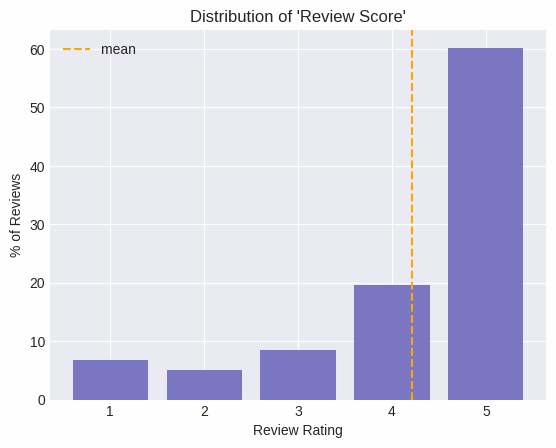

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/distribution_of_review_score.jpeg'

In [61]:
# PLOTING RATING DISTRIBUTION
values, counts = np.unique(cut_merged_df["review_score"], return_counts=True)
normalized_counts = counts/counts.sum()

review_dist_plot = plt.figure()
plt.bar(values, normalized_counts * 100)
plt.axvline(cut_merged_df["review_score"].mean(), color="orange", linestyle="--", label="mean")
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.title("Distribution of 'Review Score'")
plt.legend()
plt.show()
plt.savefig("Downloads/distribution_of_review_score.jpeg")

In [62]:
cut_merged_df.describe()

,review_score
count,2974302.0
mean,4.213713
std,1.204207
min,1.0
25%,4.0
50%,5.0
75%,5.0
max,5.0


In [63]:
#plotting rating per author
cut_merged_df["authors"].value_counts(normalize=True)

unknown                                              0.130169
J. R. R. Tolkien                                      0.01225
Jane Austen                                          0.011948
Charles Dickens                                       0.00708
John Steinbeck                                       0.005614
                                                       ...   
University of Illinois (Urbana-Champaign campu...         0.0
Patricia Houlihan Parsons', 'Patricia J. Parsons          0.0
Howard T. Smith                                           0.0
Mark William Kramer                                       0.0
Saint Romanos                                             0.0
Name: authors, Length: 127279, dtype: Float64

I can see that J R R Tolkien appears twice on this list.The rest of the top authors appear to be quite popular and thus within expectation.

In [64]:
cut_merged_df.loc[cut_merged_df['authors'] == 'John Ronald Reuel Tolkien', ['authors']] = 'J. R. R. Tolkien'


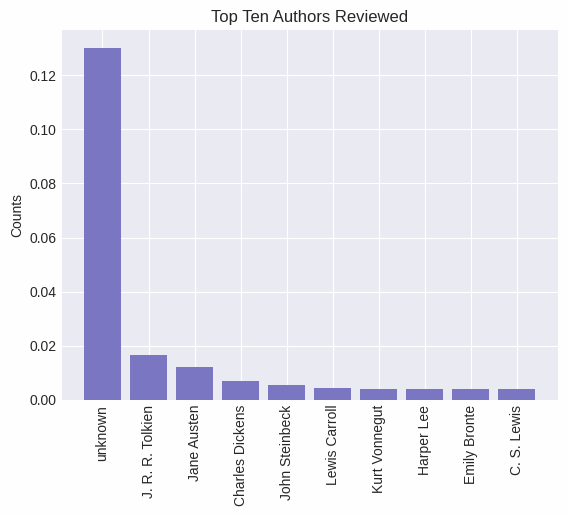

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/top_ten_authors_reviewed.jpeg'

In [65]:
# Create a Pandas Series and calculate the value counts
value_counts_series = cut_merged_df["authors"].value_counts(normalize=True)

# Get the top ten values
top_ten = value_counts_series.head(10)

# Plot the top ten values
plt.bar(top_ten.index, top_ten.values)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('Top Ten Authors Reviewed')
plt.show()
plt.savefig("Downloads/top_ten_authors_reviewed.jpeg")

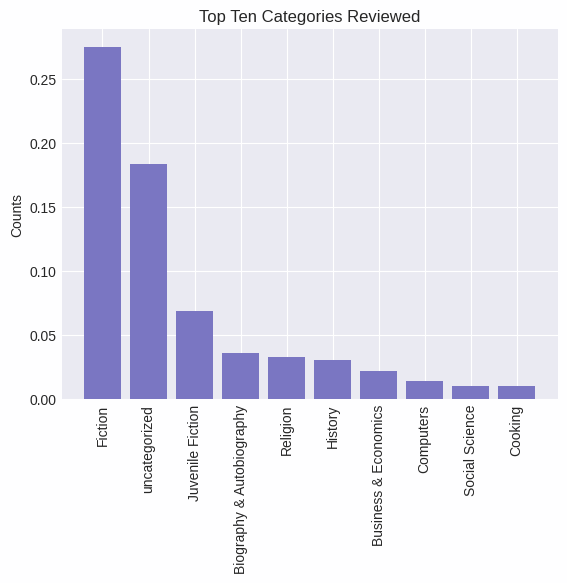

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/top_ten_categories.jpeg'

In [66]:
#plotting top 10 categories
category_counts = cut_merged_df["categories"].value_counts(normalize=True)
# Get the top ten values
top_ten_categories = category_counts.head(10)

# Plot the top ten values
plt.bar(top_ten_categories.index, top_ten_categories.values)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('Top Ten Categories Reviewed')

plt.show()
plt.savefig("Downloads/top_ten_categories.jpeg")

In [67]:
cut_merged_df.groupby('Title')['review_score'].mean().plot(kind='bar', figsize=(15,5))
plt.title('Number of ratings on top 10 books', fontsize = 15)
plt.grid()
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='Title', data=cut_merged_df)
plt.show()

top_ten_books = cut_merged_df[['review_score','Title']].groupby(['Title'], as_index=False).mean()
top_ten_books.sort_values(by=['review_score'],ascending=False).head(10)

# Export Final Data Frame

In [68]:
#CHECK: what is the final dataframe used?
final_df = cut_merged_df

In [72]:
#DF to CSV download
final_df.to_csv('combined_book_data_cleaned.csv')
!cp combined_book_data_cleaned.csv "/content/drive/My Drive/"
